In [127]:
# In this script we are going to perform an analysis of the data from the HeartFailure dataset
#
# CITATION: fedesoriano. (September 2021). Heart Failure Prediction Dataset. 
# Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.# 
# 
# AcknowledgementS: Creators:
#
# Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
# University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
# University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
# V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#
# Donor:
# David W. Aha (aha '@' ics.uci.edu) (714) 856-8779
#
# License: Database: Open Database, Contents: © Original Authors
#
# Autor: Carlos Javier Cuenca Paños
# SPAIN

In [128]:
# Loading the main libraries we will need

In [129]:
import numpy as np 
import pandas as pd 

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [132]:
# Parameterize graphs
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='rainbow',
              font='sans',
              font_scale=1,
              color_codes=True,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [133]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


In [134]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.precision", 3)

In [135]:
# PFile upload. All images and files are located in the "../media/"" directory.
df = pd.read_csv('../media/heart.csv')

In [136]:
df.head().style.set_properties(**{'background-color': 'lightgrey',
                           'color': 'black',
                           'border-color': 'darkblack'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


In [137]:
df.shape

(918, 12)

In [138]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

**-------------------------------ATRIBUTOS-----------------------------------------------------**
                    
**Age** : Age of the patien (La edad del paciente) [years]

**Sex**: Sex of the patient (El sexo del paciente)  [M: Male, F: Female]

**ChestPainType**: Ch Chest pain type (Tipo de dolor de pecho) [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP**: Resting blood pressure [mm Hg] (presión arterial en reposo):
   - Tension Baja - 90/60mmHg tenemos la tensión baja [mm Hg]
   - Hipertenso - por encima de los 140/90 mmHg somos hipertensos
   - Tension Normal - 120 mmHg para la sistólica y 80 mmHg
   - Tension normal alta - Entre 120/80 mmHg y los 139/89mmHg,

**Cholesterol**: Serum cholesterol [mm/dl] (Colesterol serico. Es el colesterol total e incluye ambos tipos: El colesterol de lipoproteína de baja densidad (LDL, por su sigla en inglés) y el colesterol de lipoproteína de alta densidad (HDL, por su sigla en inglés) o Colesterol malo (LDL) Se mide en [mm/dl])

  Para personas de 20 años o mayores un nivel saludable es 125 a 200 mg/dL


**FastingBS**: Fasting blood sugar (Nivel de azucar en ayunas) [1: if FastingBS > 120 mg/dl, 0: otherwise]
   - Los valores de azúcar en la sangre en ayunas de 99 mg/dl o menores son normales, 
   - los de 100 a 125 mg/dl indican que tiene prediabetes 
   - los de 126 mg/dl o mayores indican que tiene diabetes.

**RestingECG**:  Resting ElectroCardioGram results (Resultados electrocardiográficos en reposo):
   - Normal: Normal
   - ST:  Tener anormalidad de onda ST-T (inversiones de onda T y / o elevación o Depresión de ST de > 005 mV))
          (having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) )
   - LVH: Muestra hipertropía ventricular izquierda probable o definitiva según los criterios de Estes.
          (showing probable or definite left ventricular hypertrophy by Estes' criteria)

**MaxHR**:  Maximum heart rate achieved (frecuencia cardíaca máxima alcanzada) [Numeric value between 60 and 202]
   - Una frecuencia cardíaca en reposo normal para los adultos oscila entre 60 y 100 latidos por minuto. La maxima frecuencia se      puede obtener FC max = 206 – 0.88 x edad. 

**ExerciseAngina**: Exercise-induced angina (Angina inducida por ejercicio) [Y: Yes, N: No]

**Oldpeak**: Oldpeak = ST (Depresión del ST inducida por el ejercicio en relación con el descanso) [Numeric value measured in depression]

**ST_Slope**: The slope of the peak exercise ST segment (La pendiente del segmento ST de ejercicio pico (categórica con 3 niveles) )
   - Up: upsloping - ascenso
   - Flat: flat - plano
   - Down: downsloping - descenso

**HeartDisease**: Output class (Enfermedad del corazón/normal) [1: heart disease, 0: Normal]


In [139]:
df.duplicated().sum()

0

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [141]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [142]:
# No null data

In [143]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000,918.000,918.000,918.000,918.000,918.000,918.000
mean,53.511,132.397,198.800,0.233,136.809,0.887,0.553
std,9.433,18.514,109.384,0.423,25.460,1.067,0.497
min,28.000,0.000,0.000,0.000,60.000,-2.600,0.000
25%,47.000,120.000,173.250,0.000,120.000,0.000,0.000
50%,54.000,130.000,223.000,0.000,138.000,0.600,1.000
75%,60.000,140.000,267.000,0.000,156.000,1.500,1.000
max,77.000,200.000,603.000,1.000,202.000,6.200,1.000


In [144]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count','max', 'min'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [145]:
# Analyss values to 0

In [146]:
df[(df.Cholesterol==0)].Cholesterol.value_counts()

0    172
Name: Cholesterol, dtype: int64

In [147]:
Cholesterol_zero = df[df['Cholesterol'] == 0]
Cholesterol_zero

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
298,51,M,ASY,110,0,1,Normal,92,N,0.0,Flat,1
299,47,M,ASY,110,0,1,ST,149,N,2.1,Up,1
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat,1
301,55,M,ATA,140,0,0,ST,150,N,0.2,Up,0
302,53,M,ASY,125,0,1,Normal,120,N,1.5,Up,1


In [148]:
### Converting Zero Value of Cholesterol 

In [149]:
Cholesterol_zero=Cholesterol_zero.groupby(by=[Cholesterol_zero.Sex, Cholesterol_zero.Age, Cholesterol_zero.ST_Slope, Cholesterol_zero.HeartDisease],as_index=False).Cholesterol.value_counts()
Cholesterol_zero

,Sex,Age,ST_Slope,HeartDisease,Cholesterol,count
0,F,38,Flat,1,0,1
1,F,38,Up,1,0,1
2,F,50,Flat,1,0,1
3,F,51,Up,1,0,1
4,F,62,Down,1,0,1
5,F,62,Flat,1,0,1
6,F,63,Up,0,0,1
7,F,64,Down,1,0,1
8,F,64,Flat,1,0,1
9,F,66,Flat,1,0,1


In [150]:
def media_colesterol(df, d_HeartDisease,d_ST_Slope, d_Age, d_Sex):
    condiciones = (df.HeartDisease == d_HeartDisease) & (df.ST_Slope == d_ST_Slope) & (df.Age//10 == d_Age//10) & (df.Sex == d_Sex)
    media=df.loc[condiciones].Cholesterol.mean()

    if pd.isna(media) or media==0:
        if d_Sex == 0:
            condiciones = (df.HeartDisease == d_HeartDisease) & (df.ST_Slope == d_ST_Slope) & (df.Age//10 == d_Age//10) & (df.Sex == 1)
            media=df.loc[condiciones].Cholesterol.mean()                
        else:   
            condiciones = (df.HeartDisease == d_HeartDisease) & (df.ST_Slope == d_ST_Slope) & (df.Age//10 == d_Age//10) & (df.Sex == 0)
            media=df.loc[condiciones].Cholesterol.mean()        
    if pd.isna(media) or media==0:
        condiciones = (df.HeartDisease == d_HeartDisease) & (df.Age//10 == d_Age//10) & (df.Sex == d_Sex)
        media=df.loc[condiciones].Cholesterol.mean()

    return media

In [151]:
media = 0
for i in range(len(df)):
    if df["Cholesterol"].values[i]==0:
        media = media_colesterol(df, df["HeartDisease"].values[i], df["ST_Slope"].values[i], df["Age"].values[i], df["Sex"].values[i])        
 
        if pd.isna(media) or media==0:
            media = df["Cholesterol"].mean()
        df["Cholesterol"].values[i] = int(round(media))


In [152]:
df[df.Cholesterol==0].count()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [153]:
### Converting Zero Value of RestingBP 

In [154]:
RestingBP = df[df['RestingBP'] == 0]
RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,222,0,Normal,155,N,1.5,Flat,1


In [155]:
def media_RestingBP(df, d_Age, d_Cholesterol ,d_HeartDisease, d_Sex, d_ExerciseAngina):
    condiciones = (df.Age//10 == d_Age//10) & (df.Cholesterol//10 == d_Cholesterol//10) & (df.HeartDisease == d_HeartDisease) & (df.Sex == d_Sex)  & (df.ExerciseAngina == d_ExerciseAngina)
    media=df.loc[condiciones].RestingBP.mean()   
    if pd.isna(media) or media ==0:
        condiciones = (df.HeartDisease == d_HeartDisease) & (df.Age//10 == d_Age//10) & (df.Sex == d_Sex)
        media=df.loc[condiciones].Cholesterol.mean()
    return media

In [156]:
for i in range(len(df)):
    if df["RestingBP"].values[i]==0:
        media = media_RestingBP(df, df.Age.values[i], df.Cholesterol.values[i], df.HeartDisease.values[i], df.Sex.values[i], df.ExerciseAngina.values[i]) 
        if pd.isna(media) or media==0:
            media = df["Cholesterol"].mean()
        df["RestingBP"].values[i] = media

In [157]:
df[(df.RestingBP==0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [158]:
tipos_datos=df.dtypes
tipos_datos

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [159]:
tipos_datos.values

array([dtype('int64'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('O'), dtype('int64'),
       dtype('O'), dtype('float64'), dtype('O'), dtype('int64')],
      dtype=object)

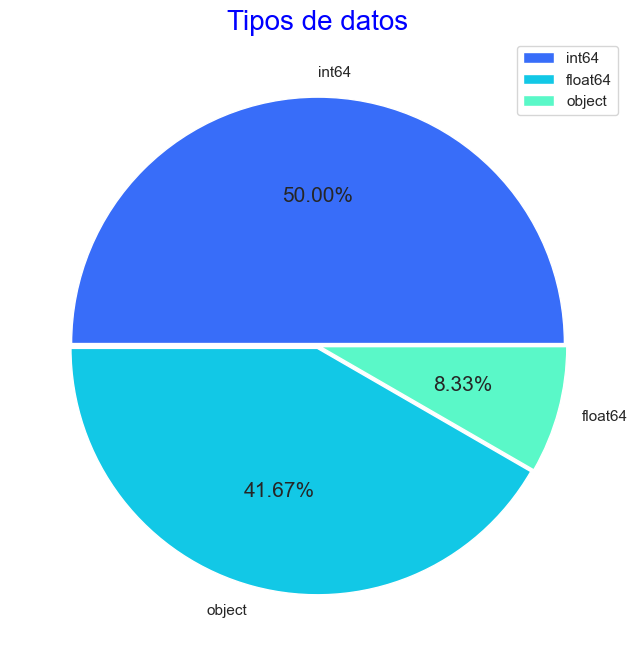

In [160]:
matplotlib.rcParams.update({'font.size': 15})
tipos_datos.value_counts().plot.pie(explode=[0.01,0.01,0.01],autopct='%1.2f%%',shadow=False)
plt.title('Tipos de datos', fontsize = 20,color='blue',font='sans')
plt.legend(labels=['int64','float64','object'])
plt.axis('off');

In [161]:
# FastingBS & HeartDisease are numerical but conceptually categorized

In [162]:
categorical = df.select_dtypes(include=['object']).columns
print(categorical)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [163]:
df[df['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count','max', 'min'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,236.907317,55.241600,85.000000,201.000000,229.500000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [164]:
df[df['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count','max', 'min'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.391732,18.955208,92.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,232.897638,61.602702,82.000000,193.000000,223.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,508.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
# summary statistics of categorical columns
df.describe(include = [np.object])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


# Numerical variable analysis

In [166]:
numerical = df.select_dtypes(include=['int64','float64']).columns
print(numerical)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


In [167]:
# FastingBS & HeartDisease are numerical but conceptually categorized

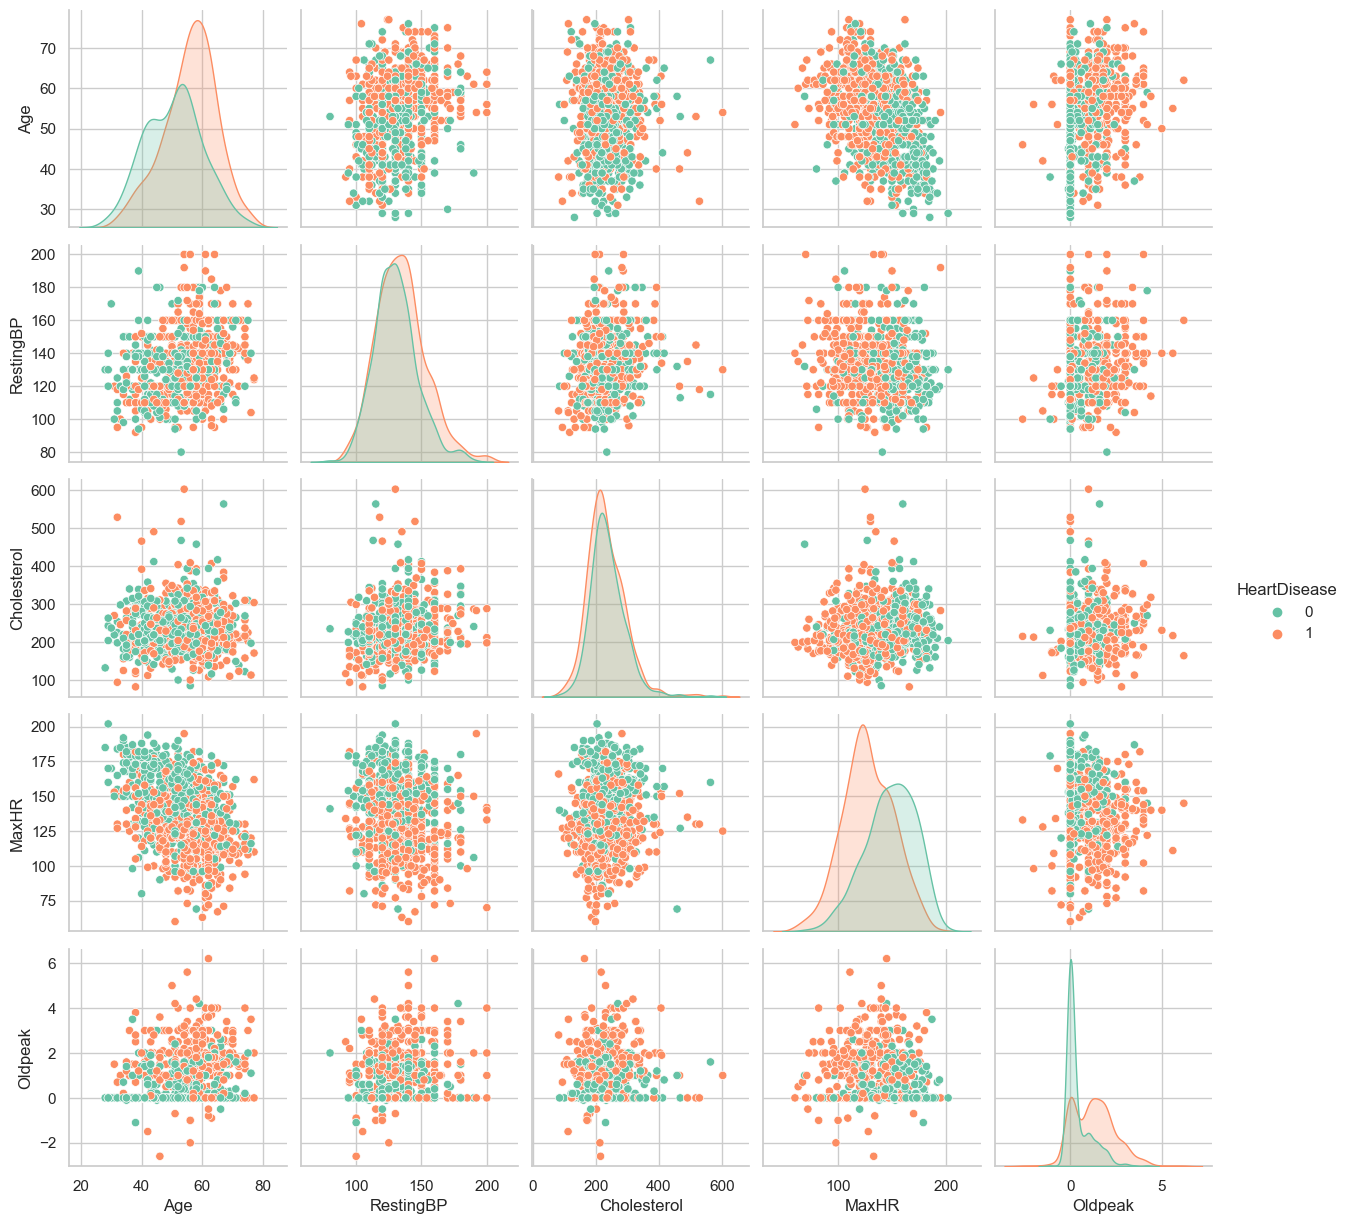

In [168]:
# Visualize the whole dataset de los valores de las variables multiples: Age, RestingBP, Cholesterol, MaxHR
data_multiple = df[['Age', 'RestingBP', 'Cholesterol', "MaxHR", "Oldpeak","HeartDisease"]].copy()
g = sns.pairplot(data_multiple, hue='HeartDisease', palette="Set2", diag_kind="kde", height=2.5)
plt.show()

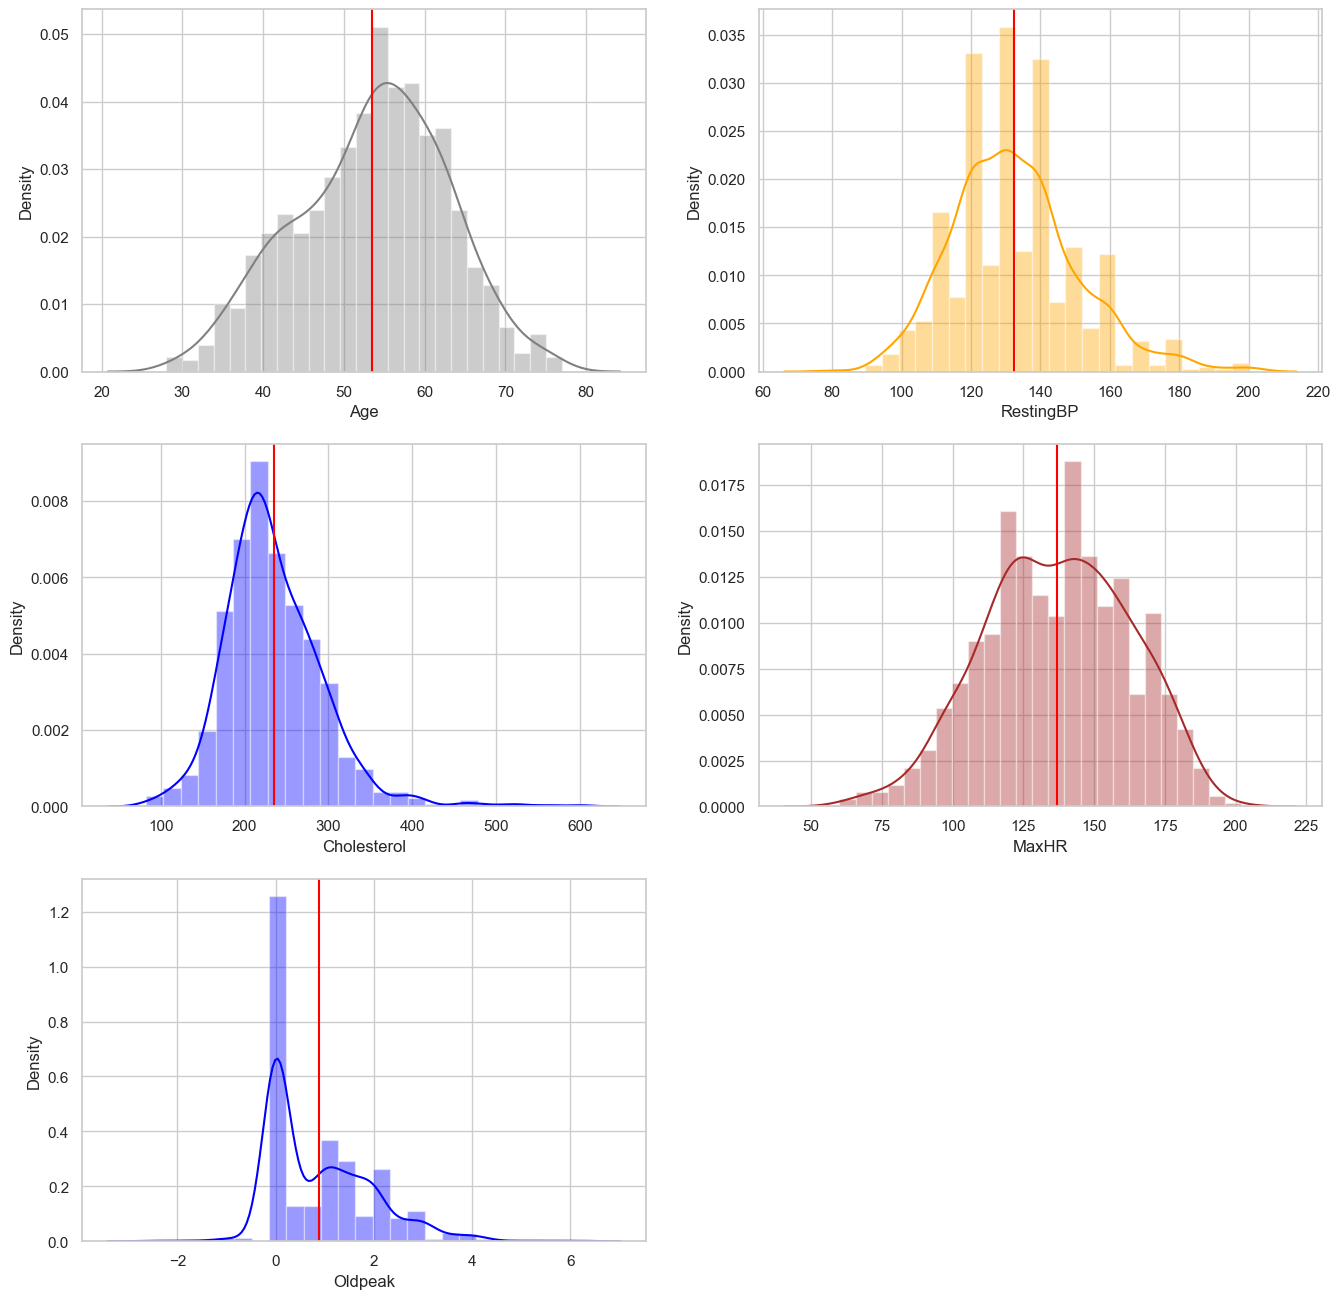

In [169]:
plt.figure(figsize=(16,16))

plt.subplot(321)
sns.distplot(df["Age"],bins=25, color="gray", label="Skewness : %.2f"%(df["Age"].skew()));
plt.axvline(x = df.Age.mean(), color = 'red', label = 'media'); 

plt.subplot(322)
sns.distplot(df["RestingBP"],bins=25, color="orange", label="Skewness : %.2f"%(df["RestingBP"].skew()));
plt.axvline(x = df.RestingBP.mean(), color = 'red', label = 'media');

plt.subplot(323)
sns.distplot(df["Cholesterol"],bins=25, color="Blue", label="Skewness : %.2f"%(df["Cholesterol"].skew()));
plt.axvline(x = df.Cholesterol.mean(), color = 'red', label = 'media');

plt.subplot(324)
sns.distplot(df["MaxHR"],bins=25, color="brown", label="Skewness : %.2f"%(df["MaxHR"].skew()));
plt.axvline(x = df.MaxHR.mean(), color = 'red', label = 'media'); 

plt.subplot(325)
sns.distplot(df["Oldpeak"],bins=25, color="Blue", label="Skewness : %.2f"%(df["Oldpeak"].skew()));
plt.axvline(x = df.Oldpeak.mean(), color = 'red', label = 'media');


In [170]:
# Age visualization versus HeartDisease

In [171]:
fig = px.histogram(df, x="Age", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'});
fig.show()

In [172]:
# RestingBP visualization versus HeartDisease

In [173]:
fig = px.histogram(df, x="RestingBP", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'});
fig.show()

In [174]:
# Cholesterol visualization versus HeartDisease

In [175]:
fig = px.histogram(df, x="Cholesterol", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'});
fig.show()

In [176]:
# MaxHR visualization versus HeartDisease

In [177]:
fig = px.histogram(df, x="MaxHR", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'});
fig.show()

In [178]:
# Oldpeak visualization versus HeartDisease

In [179]:
fig = px.histogram(df, x="Oldpeak", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'});
fig.show()

In [180]:
# There are no preliminary conclusions about the greater probability of having heart disease 
# after the study of the numerical variables.

# Categorical  variable analysis

In [181]:
# FastingBS & HeartDisease are numerical but conceptually categorized
categorical = df.select_dtypes(include=['object']).columns
print(categorical)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [182]:
# HeartDisease visualization

In [183]:
fig1 = px.pie(df, names='HeartDisease', width=600, height=400)
fig1.update_layout(title='% of HeartDisease').show()

In [184]:
# FastingBS visualization

In [185]:
fig = px.histogram(df, x="FastingBS", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'});
fig.show()

In [186]:
fig1 = px.pie(df, names='FastingBS',facet_col='HeartDisease', width=800, height=400)
fig1.update_layout(title='% of FastingBS').show()

In [187]:
# Sex visualization

In [188]:
fig = px.histogram(df, x="Sex", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'});
fig.show()

In [189]:
fig1 = px.pie(df, names='Sex',facet_col='HeartDisease', width=800, height=400)
fig1.update_layout(title='% of Sex').show()

In [190]:
# ChestPainType visualization versus HeartDisease

In [191]:
fig = px.histogram(df, x="ChestPainType", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'});
fig.show()

In [192]:
fig1 = px.pie(df, names='ChestPainType',facet_col='HeartDisease', width=800, height=400)
fig1.update_layout(title='% of ChestPainType').show()

In [193]:
# RestingECG visualization versus HeartDisease

In [194]:
fig = px.histogram(df, x="RestingECG", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'});
fig.show()

In [195]:
fig1 = px.pie(df, names='RestingECG',facet_col='HeartDisease', width=800, height=400)
fig1.update_layout(title='% of RestingECG').show();

In [196]:
# ExerciseAngina visualization versus HeartDisease

In [197]:
fig = px.histogram(df, x="ExerciseAngina", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'});
fig.show()

In [198]:
fig1 = px.pie(df, names='ExerciseAngina',facet_col='HeartDisease', width=800, height=400)
fig1.update_layout(title='% of ExerciseAngina').show()

In [199]:
# ST_Slope visualization versus HeartDisease

In [200]:
fig = px.histogram(df, x="ST_Slope", 
                   color="HeartDisease", 
                   marginal="box", 
                   histnorm='probability density', 
                   color_discrete_map={0:'#0D3383',1:'#D81E1F'});
fig.show()

In [201]:
fig1 = px.pie(df, names='ST_Slope',facet_col='HeartDisease', width=800, height=400)
fig1.update_layout(title='% of ST_Slope').show()

In [202]:
# The values of the categorical variables with the highest percentage of having heart disease are:
#  FastingBS = 1 (FastingBS > 120 mg/dl)
#  Sex = M
#  ChestPainType = ASY (ASY: Asymptomatic)
#  RestingECG = ST (having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) )
#  ExerciseAngina = Y
#  ST_Slope = Flat (the slope of the peak exercise ST segmen es FLAT)

In [203]:
print(numerical)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


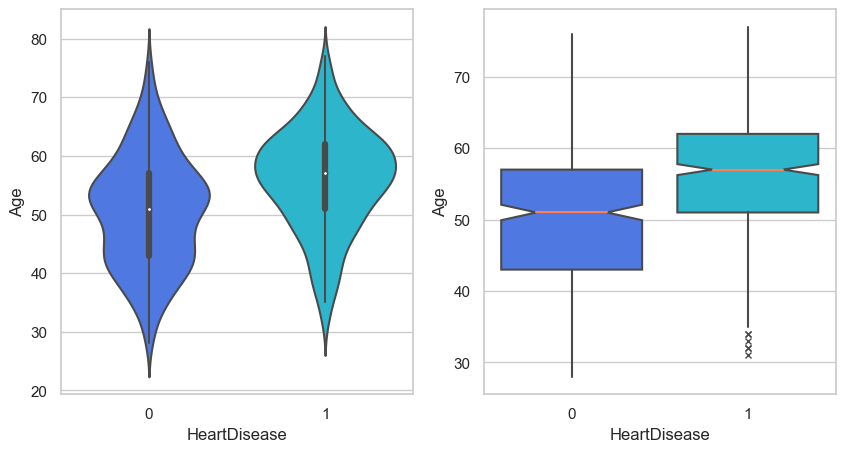

In [204]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

sns.violinplot(x="HeartDisease", y="Age", data=df, kind = "violin", inner = "box", ax = ax[0]);
sns.boxplot(data=df, x="HeartDisease", y="Age", notch=True, showcaps=False, flierprops={"marker": "x"},
            medianprops={"color": "coral"}, ax = ax[1]);

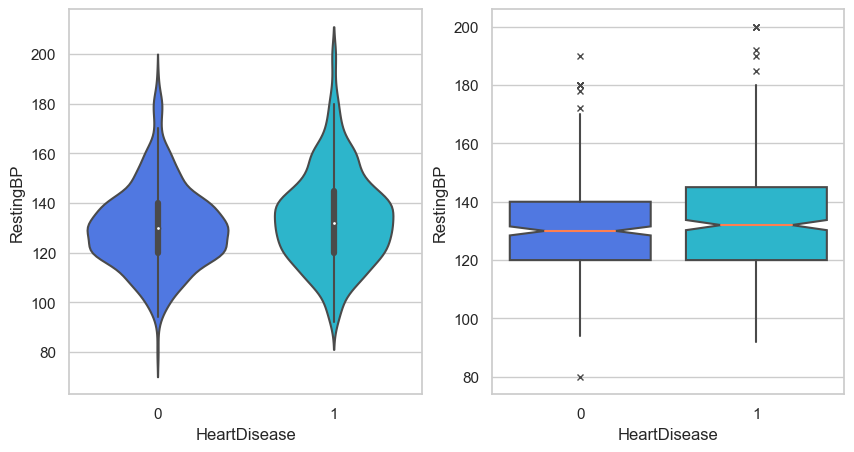

In [205]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

sns.violinplot(x="HeartDisease", y="RestingBP", data=df, kind = "violin", inner = "box", ax = ax[0]);
sns.boxplot(data=df, x="HeartDisease", y="RestingBP",notch=True, showcaps=False, flierprops={"marker": "x"},
            medianprops={"color": "coral"}, ax = ax[1]);

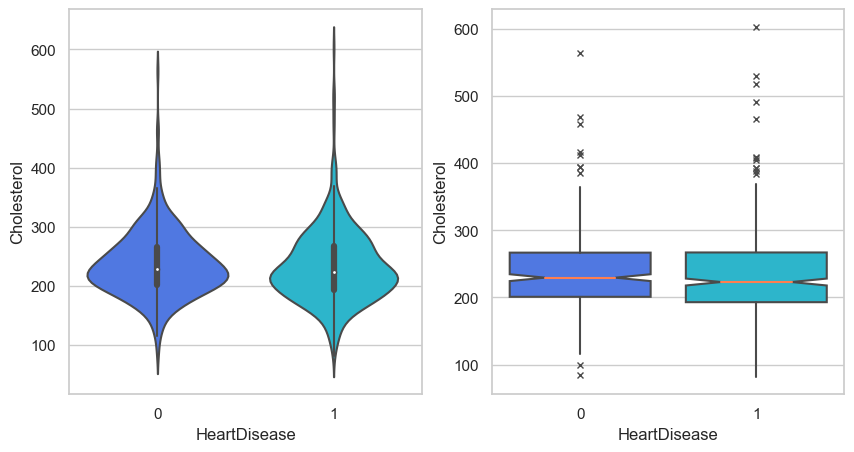

In [206]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

sns.violinplot(x="HeartDisease", y="Cholesterol", data=df, kind = "violin", inner = "box", ax = ax[0]);
sns.boxplot(data=df, x="HeartDisease", y="Cholesterol",notch=True, showcaps=False, flierprops={"marker": "x"},
            medianprops={"color": "coral"}, ax = ax[1]);

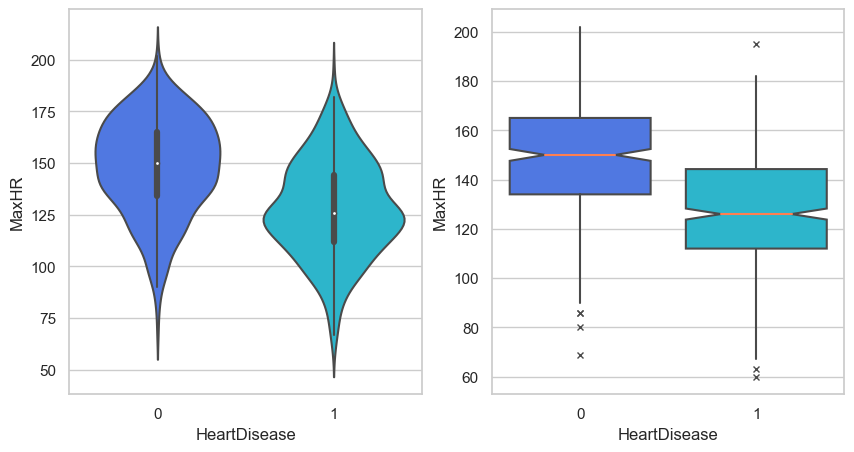

In [207]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

sns.violinplot(x="HeartDisease", y="MaxHR", data=df, kind = "violin", inner = "box", ax = ax[0]);
sns.boxplot(data=df, x="HeartDisease", y="MaxHR",notch=True, showcaps=False, flierprops={"marker": "x"},
            medianprops={"color": "coral"}, ax = ax[1]);

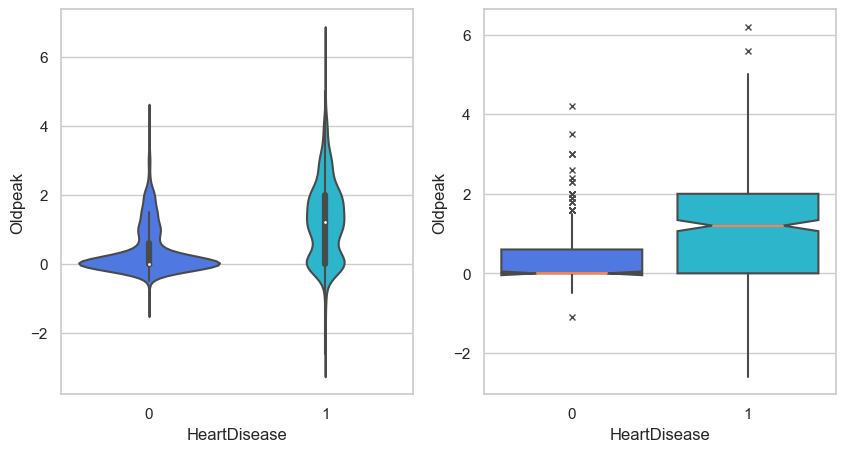

In [208]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

sns.violinplot(x="HeartDisease", y="Oldpeak", data=df, kind = "violin", inner = "box", ax = ax[0]);
sns.boxplot(data=df, x="HeartDisease", y="Oldpeak",notch=True, showcaps=False, flierprops={"marker": "x"},
            medianprops={"color": "coral"}, ax = ax[1]);

# Categorical Transformation

In [209]:
# Before doing the correlation analysis, we transformed the categorical variables into numerical ones.

In [210]:
categorical

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [211]:
for col in df[categorical]:
    print(df[categorical][col].value_counts()) 
    print("****"*10)

M    725
F    193
Name: Sex, dtype: int64
****************************************
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
****************************************
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
****************************************
N    547
Y    371
Name: ExerciseAngina, dtype: int64
****************************************
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
****************************************


In [212]:
def categorical_transformation(df, tipo):
    
    if tipo == "parcial":
        # TA: 0, ATA: 1, NAP: 2, ASY: 3]
        df.ChestPainType = df.ChestPainType.map({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})
        
        # Normal : 0, ST : 1, LVH : 2]
        df.RestingECG = df.RestingECG.map({'Normal': 0, 'ST': 1, 'LVH': 2})
        
        # Up : 0, Flat : 1, Down : 2]
        df.ST_Slope = df.ST_Slope.map({'Up': 0, 'Flat': 1, 'Down': 2})
        
        # Applying get_dummies to binary variables
        df = pd.get_dummies(df, columns = ['Sex', 'ExerciseAngina'], drop_first=True)
        
        df = df[['Age','Sex_M','ChestPainType','RestingBP',
         'Cholesterol','FastingBS','RestingECG','MaxHR',
         'ExerciseAngina_Y','Oldpeak','ST_Slope','HeartDisease']]
        
    elif tipo == "total":
        df = pd.get_dummies(df,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], drop_first=True)
        
        df = df[['Age','Sex_M','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','RestingBP',
                 'Cholesterol','FastingBS','RestingECG_Normal','RestingECG_ST','MaxHR',
                 'ExerciseAngina_Y','Oldpeak','ST_Slope_Flat','ST_Slope_Up','HeartDisease']]
    return df

In [213]:
# Applying categorical transformatio
data = categorical_transformation(df, "parcial")
display(data.head())

,Age,Sex_M,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina_Y,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


# Correlations Studio

In [214]:
data.corr().T.style.background_gradient(cmap='coolwarm')

,Age,Sex_M,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina_Y,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,0.165896,0.262482,-0.000623,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Sex_M,0.055750,1.000000,0.168254,0.008554,-0.149496,0.120076,-0.018343,-0.189186,0.190664,0.105734,0.150693,0.305445
ChestPainType,0.165896,0.168254,1.000000,0.021067,-0.010530,0.116703,0.031383,-0.343654,0.416625,0.245027,0.317480,0.471354
RestingBP,0.262482,0.008554,0.021067,1.000000,0.126911,0.068644,0.095619,-0.110714,0.154185,0.173041,0.081041,0.116291
Cholesterol,-0.000623,-0.149496,-0.010530,0.126911,1.000000,-0.105755,0.096533,0.072433,0.056596,0.049552,0.007008,-0.033891
FastingBS,0.198039,0.120076,0.116703,0.068644,-0.105755,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,-0.018343,0.031383,0.095619,0.096533,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,-0.189186,-0.343654,-0.110714,0.072433,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina_Y,0.215793,0.190664,0.416625,0.154185,0.056596,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,0.105734,0.245027,0.173041,0.049552,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


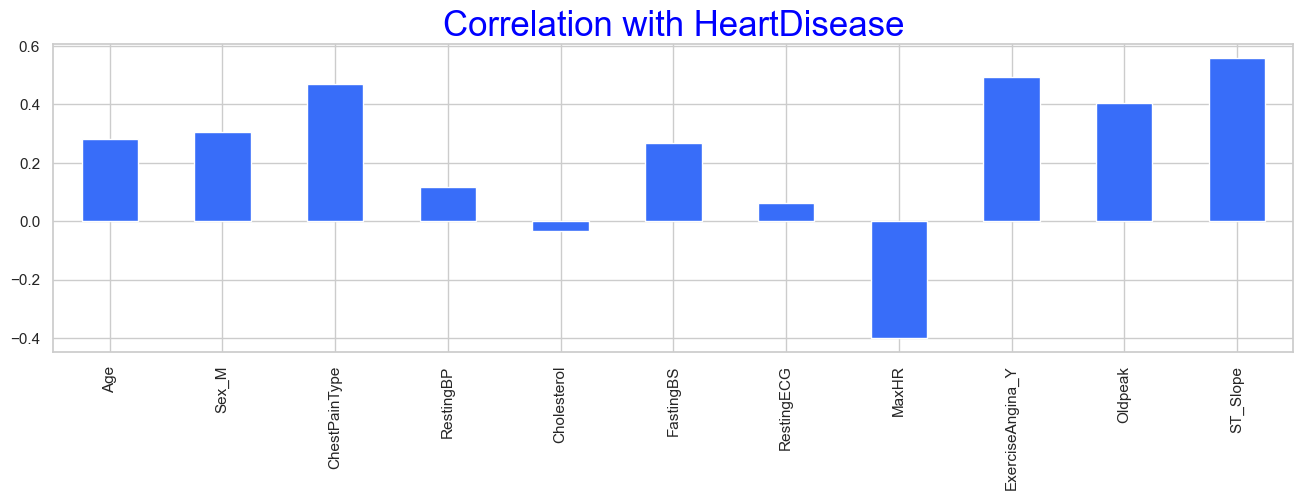

In [215]:
#Correlation with Response Variable class
X = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']

X.corrwith(y).plot.bar(figsize=(16, 4), rot=90, grid=True)
plt.title('Correlation with HeartDisease',
          fontsize=25,
          color='blue',
          font='sans')
plt.show()

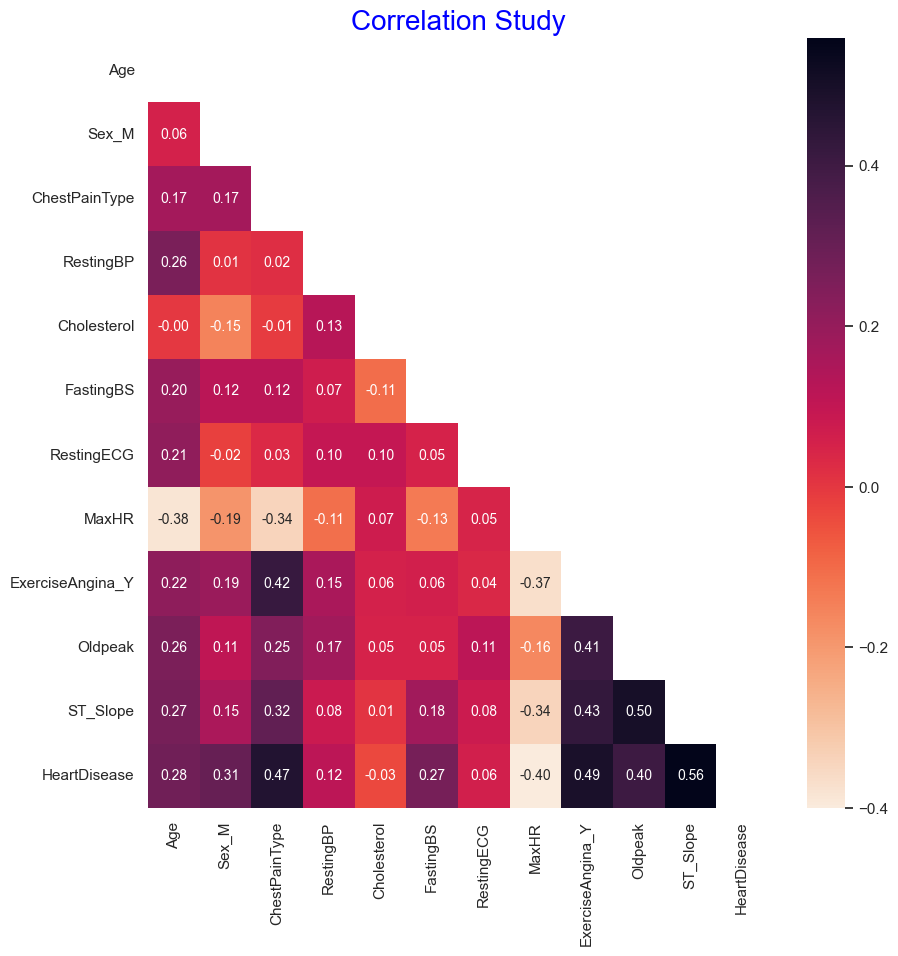

In [216]:
matplotlib.rcParams.update({'font.size': 10})

mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize=(10, 10))
plt.title('Correlation Study', fontsize=20, color='blue', font='sans')
sns.heatmap(data.corr(),
            mask=mask,
            annot=True,
            lw=0,
            linecolor='white',
            linewidths=2,
            cmap='rocket_r',
            fmt="0.2f")

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [217]:
# Train Test data

In [218]:
X = data.drop(['HeartDisease'],axis=1) 
y = data['HeartDisease']

In [219]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [220]:
def scaling(X_train,X_test):
    # scaling dataset with robust scaler
    from sklearn.preprocessing import StandardScaler
    std_scaler = StandardScaler()
    std_scaler.fit(X)
    X_train_std=std_scaler.transform(X_train)
    X_test_std=std_scaler.transform(X_test)

    X_train = pd.DataFrame(X_train_std, columns=X.columns)
    X_test = pd.DataFrame(X_test_std, columns=X.columns)
    
    return X_train, X_test

In [221]:
# no applying scaling, no improve the result
#X_train,X_test = scaling(X_train,X_test)
#display(X_train.head())
#display(X_test.head())

# TESTING CLASSIFICATION MODELS

In [222]:
algoritmos_clasificacion = ['Logistic Regression', "KNeighbors Classifier" , 'Support Vector Machine', "Gaussian NB", 
                           "Decision Tree Classifier", "Random Forest Classifier", "Extra Trees Classifier",
                            "Gradient Boosting Classifier", "Ridge Classifier", "Light Gradient Boosting Machine",
                            "Ada Boost Classifier","Linear Discriminant Analysis", "QuadraticDiscriminantAnalysis",
                            "Dummy Classifier", "SGD Classifier", "MLP Classifier", "XGB Classifier", "Bagged Decision Trees"
                           ]

In [223]:
instrucciones_algoritmos_cl = ["LogisticRegression(random_state=16)", 
                               "KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)" ,
                               "SVC(kernel= 'linear', random_state=1, C=0.1)", 
                               "GaussianNB()",
                               "DecisionTreeClassifier (criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=42)", 
                               "RandomForestClassifier(n_estimators=100)", 
                               "ExtraTreesClassifier(random_state=1)",
                               "GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)",
                               "RidgeClassifier(class_weight=None)",
                               "LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)",
                               "AdaBoostClassifier(n_estimators=100, random_state=0)",
                               "LinearDiscriminantAnalysis()",
                               "QuadraticDiscriminantAnalysis()",
                               "DummyClassifier(strategy='most_frequent')",
                               "SGDClassifier(max_iter=1000, tol=0.01)",
                               "MLPClassifier(random_state=1, max_iter=300)",
                               "Xgb.XGBClassifier(objective='reg:linear', random_state=42)",
                               "BaggingClassifier(n_estimators=100, max_features=10, random_state=1)"
                              ]

In [224]:
def indicadores_precision_modelo(clf,X_train, y_train, y_test, y_pred):
    
    from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report

    # Training Accuracy
    train_accuracy = round(clf.score(X_train, y_train), 2)
    
    # Model precision. Porcentaje de valores positivos clasificados como positivos. Precision = TP / (TP + FP)
    precision = round(precision_score(y_test, y_pred, average='macro'),2)
    
    # Accuracy model. Porcentaje total de valores correctamente clasificados. exactitud = (TP + TN) / (TP + TN + FP + FN)
    exactitud = round(accuracy_score(y_test, y_pred),2)
    
    # Calcular la sensibilidad o ratio de verdaderos positivos del modelo. Recall = TP / (TP + FN)
    # Es utilizada para saber cuantos valores positivos son correctamente clasificados.
    sensibilidad = round(recall_score(y_test, y_pred, average='macro'),2)
    
    #Calculo el puntaje F1 del modelo. Combina el precision y el recall para datos desbalanceados
    # F1 = 2 * ((recall * precision)/(recall + precision))
    puntajef1 = round(f1_score(y_test, y_pred, average='macro'),2)
    
    puntaje_total = round((precision+exactitud+sensibilidad+puntajef1)/4,2)
    
    
    # Al ser una clasificacion binaria usamos la area under curve 
    # El valor de esta métrica se encuentra en un rango entre 0 y 1
    area_under_curve = roc_auc_score(y_test, y_pred)
    
    #  Matriz de confusion 
    #   (TP (True Positive)    FP (False Positive)  )
    #   (FN (False Negative)   TN (True Negative)   )
    cm = confusion_matrix(y_test, y_pred)
    
    return train_accuracy, precision, exactitud, sensibilidad, puntajef1, puntaje_total, area_under_curve, cm

In [225]:
def Estimacion_Algoritmos_Clasificacion(algoritmo, instruccion, df):
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import RidgeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.linear_model import RidgeClassifier
    from lightgbm import LGBMClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    from sklearn.dummy import DummyClassifier
    from sklearn.linear_model import SGDClassifier
    from sklearn.neural_network import MLPClassifier
    import xgboost as Xgb
    from sklearn.ensemble import BaggingClassifier
    
    
    from sklearn.metrics import confusion_matrix
    
    X = df.drop(['HeartDisease'],axis=1) 
    y = df['HeartDisease']
    
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)
        
    clf = eval(instruccion)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    data_precision = indicadores_precision_modelo(clf,X_train, y_train, y_test, y_pred)
        
    lista_fila = [algoritmo, data_precision[0], data_precision[1], data_precision[2], data_precision[3], data_precision[4], data_precision[5], data_precision[6], data_precision[7],instruccion]
    
    return lista_fila

In [226]:
estimacion_modelo = pd.DataFrame(columns=['algoritmo', 'train_accuracy','precision', 'exactitud', 'sensibilidad', 
                                          'puntajef1', 'puntaje_total','area_under_curve','confusion_matrix','instruccion'])

for i in range(len(algoritmos_clasificacion)):
    resultado = Estimacion_Algoritmos_Clasificacion(algoritmos_clasificacion[i], instrucciones_algoritmos_cl[i], data)
    indice=len(estimacion_modelo)
    estimacion_modelo.loc[indice]=resultado
    


[12:50:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [227]:
estimacion_modelo

,algoritmo,train_accuracy,precision,exactitud,sensibilidad,puntajef1,puntaje_total,area_under_curve,confusion_matrix,instruccion
0,Logistic Regression,0.85,0.83,0.83,0.83,0.83,0.83,0.825,"[[60, 16], [15, 93]]",LogisticRegression(random_state=16)
1,KNeighbors Classifier,0.74,0.67,0.67,0.67,0.67,0.67,0.673,"[[51, 25], [35, 73]]","KNeighborsClassifier(n_neighbors = 5, metric =..."
2,Support Vector Machine,0.85,0.82,0.83,0.82,0.82,0.82,0.823,"[[61, 15], [17, 91]]","SVC(kernel= 'linear', random_state=1, C=0.1)"
3,Gaussian NB,0.84,0.82,0.83,0.83,0.82,0.82,0.830,"[[65, 11], [21, 87]]",GaussianNB()
4,Decision Tree Classifier,0.86,0.82,0.83,0.82,0.82,0.82,0.819,"[[59, 17], [15, 93]]","DecisionTreeClassifier (criterion='entropy', m..."
5,Random Forest Classifier,1.00,0.86,0.86,0.86,0.86,0.86,0.857,"[[62, 14], [11, 97]]",RandomForestClassifier(n_estimators=100)
6,Extra Trees Classifier,1.00,0.87,0.88,0.87,0.87,0.87,0.870,"[[64, 12], [11, 97]]",ExtraTreesClassifier(random_state=1)
7,Gradient Boosting Classifier,0.90,0.86,0.86,0.86,0.86,0.86,0.857,"[[62, 14], [11, 97]]","GradientBoostingClassifier(n_estimators=100, l..."
8,Ridge Classifier,0.85,0.82,0.83,0.82,0.82,0.82,0.825,"[[62, 14], [18, 90]]",RidgeClassifier(class_weight=None)
9,Light Gradient Boosting Machine,1.00,0.88,0.88,0.86,0.87,0.87,0.864,"[[61, 15], [8, 100]]","LGBMClassifier(learning_rate=0.09,max_depth=-5..."


In [228]:
estimacion_modelo_sort = estimacion_modelo.sort_values(by=['exactitud','sensibilidad','precision'], ascending=False, ignore_index=True)
estimacion_modelo_sort

,algoritmo,train_accuracy,precision,exactitud,sensibilidad,puntajef1,puntaje_total,area_under_curve,confusion_matrix,instruccion
0,Extra Trees Classifier,1.00,0.87,0.88,0.87,0.87,0.87,0.870,"[[64, 12], [11, 97]]",ExtraTreesClassifier(random_state=1)
1,Light Gradient Boosting Machine,1.00,0.88,0.88,0.86,0.87,0.87,0.864,"[[61, 15], [8, 100]]","LGBMClassifier(learning_rate=0.09,max_depth=-5..."
2,Random Forest Classifier,1.00,0.86,0.86,0.86,0.86,0.86,0.857,"[[62, 14], [11, 97]]",RandomForestClassifier(n_estimators=100)
3,Gradient Boosting Classifier,0.90,0.86,0.86,0.86,0.86,0.86,0.857,"[[62, 14], [11, 97]]","GradientBoostingClassifier(n_estimators=100, l..."
4,XGB Classifier,1.00,0.86,0.86,0.86,0.86,0.86,0.859,"[[63, 13], [12, 96]]","Xgb.XGBClassifier(objective='reg:linear', rand..."
5,Bagged Decision Trees,1.00,0.86,0.86,0.86,0.86,0.86,0.859,"[[63, 13], [12, 96]]","BaggingClassifier(n_estimators=100, max_featur..."
6,Ada Boost Classifier,0.89,0.85,0.85,0.85,0.85,0.85,0.852,"[[64, 12], [15, 93]]","AdaBoostClassifier(n_estimators=100, random_st..."
7,QuadraticDiscriminantAnalysis,0.86,0.85,0.85,0.85,0.85,0.85,0.850,"[[63, 13], [14, 94]]",QuadraticDiscriminantAnalysis()
8,Logistic Regression,0.85,0.83,0.83,0.83,0.83,0.83,0.825,"[[60, 16], [15, 93]]",LogisticRegression(random_state=16)
9,Gaussian NB,0.84,0.82,0.83,0.83,0.82,0.82,0.830,"[[65, 11], [21, 87]]",GaussianNB()


In [229]:
estimacion_modelo_sort.instruccion.loc[0]

'ExtraTreesClassifier(random_state=1)'

In [230]:
# Let's try to improve the accuracy by changing the hyperparameters of the Extra Trees Classifier and Light Gradient Boosting Machine model.

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV


# Standar hyperparametres were ExtraTreesClassifier(random_state=1)
from sklearn.ensemble import ExtraTreesClassifier
modelo1_st = ExtraTreesClassifier(random_state=1)
modelo1 = ExtraTreesClassifier()
columna1 ="ExtraTreesClassifier()"
n_estimators = [10, 20, 30]
max_depth = [1, 2, 5, 8, 13, 21, 34, 53, 54, 55, 89, None] 
criterion = ['gini', 'entropy', 'log_loss']

etc_grid = dict(n_estimators = n_estimators, max_depth = max_depth, criterion = criterion)
grids1 = etc_grid  


# Standar hyperparametres were LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
from lightgbm import LGBMClassifier
modelo2_st = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
modelo2 = LGBMClassifier()
columna2 = "LGBMClassifier()"
class_weight = [None,'balanced']
boosting_type = ['gbdt', 'goss', 'dart']
num_leaves = [30,50,100,150] 
learning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 10))
max_depth = [-1,1,2,3,4,5]


lgg_grid = dict(class_weight=class_weight, max_depth = max_depth, boosting_type=boosting_type, 
                num_leaves=num_leaves, learning_rate =learning_rate)
grids2 = lgg_grid


In [232]:
# Dataframe of models score
cols = ['Case', columna1, columna2]

score_models = pd.DataFrame(columns=cols)
score_models.set_index("Case",inplace=True)
score_models.loc['Without Hyperparameters'] = 0
score_models.loc['Standard'] = 0
score_models.loc['GridSearch'] = 0
score_models.loc['RandomSearch'] = 0
score_models

,ExtraTreesClassifier(),LGBMClassifier()
Case,,
Without Hyperparameters,0,0
Standard,0,0
GridSearch,0,0
RandomSearch,0,0


In [233]:
# Dataframe of models parameters

parameters_models = pd.DataFrame(columns=cols)
parameters_models.set_index("Case",inplace=True)
parameters_models.loc['Without Hyperparameters'] = 0
parameters_models.loc['Standard'] = 0
parameters_models.loc['GridSearch'] = 0
parameters_models.loc['RandomSearch'] = 0
parameters_models

,ExtraTreesClassifier(),LGBMClassifier()
Case,,
Without Hyperparameters,0,0
Standard,0,0
GridSearch,0,0
RandomSearch,0,0


In [234]:
def mejora_acurrancy(modelo_st, columna, modelo, X_train,y_train, grids, score_models, parameters_models): 
    
    modelo_st.fit(X_train,y_train.values.ravel())
    score_models[columna].loc['Standard'] = modelo_st.score(X_test,y_test)*100

    str_modelo_st = str(modelo_st)
    ini = str_modelo_st.index("(")+1
    fin = len(str_modelo_st)-1
    subcadena = str_modelo_st[ini:fin]
    parameters_models[columna].loc['Standard'] = subcadena

    modelo.fit(X_train,y_train.values.ravel())
    score_models[columna].loc['Without Hyperparameters'] = modelo.score(X_test,y_test)*100
    parameters_models[columna].loc['Without Hyperparameters'] = ""

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)

    # se aplica GridSearchCV
    grid_search = GridSearchCV(estimator=modelo, 
                              param_grid=grids, n_jobs=-1, cv=cv,  
                              scoring='accuracy',error_score=0)
    grid_clf_acc = grid_search.fit(X_train, y_train)
    score_models[columna].loc['GridSearch'] = grid_clf_acc.score(X_test,y_test)*100
    parameters_models[columna].loc['GridSearch'] = str(grid_clf_acc.best_params_)

    # aplicación de RandomSearchCV

    n_iter_search = 3
    random_search = RandomizedSearchCV(modelo,
                                    param_distributions=grids,n_iter=n_iter_search, cv=cv)
    random_clf_acc = random_search.fit(X_train,y_train)
    score_models[columna].loc['RandomSearch'] = random_search.score(X_test,y_test)*100
    parameters_models[columna].loc['RandomSearch'] = str(random_clf_acc.best_params_)
    
    return score_models, parameters_models

# COMPROBAR CUAL ES EL MEJOR DE TODOS Y CREAR LA LISTA DE ACURRANCY PARA ESOS MODELOS

In [235]:

score_model1, parameters_models1 = mejora_acurrancy(modelo1_st, columna1, modelo1, X_train,y_train, grids1, score_models, parameters_models)
score_model, parameters_models = mejora_acurrancy(modelo2_st, columna2, modelo2, X_train,y_train, grids2, score_model1, parameters_models1)


In [236]:
display(score_model)

display(parameters_models)


,ExtraTreesClassifier(),LGBMClassifier()
Case,,
Without Hyperparameters,88.043,85.870
Standard,87.500,87.500
GridSearch,86.413,86.957
RandomSearch,89.674,84.239


,ExtraTreesClassifier(),LGBMClassifier()
Case,,
Without Hyperparameters,,
Standard,random_state=1,"learning_rate=0.09, max_depth=-5, random_state=42"
GridSearch,"{'criterion': 'gini', 'max_depth': 55, 'n_esti...","{'boosting_type': 'goss', 'class_weight': None..."
RandomSearch,"{'n_estimators': 30, 'max_depth': 8, 'criterio...","{'num_leaves': 100, 'max_depth': 2, 'learning_..."
